In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"  #0 for activate , -1 for deactivate

In [1]:
import pandas as pd
import numpy as np
import random
import os
import shutil
from os import listdir
from os.path import isfile, join
import math
import tensorflow as tf
import keras
import pickle

Using TensorFlow backend.


## move and prepare img

In [2]:
df=pd.read_csv('ctai.csv')

In [3]:
df.head(2)

,id,gender,age_group,age
0,img-id1-object-1,Male,Adult,32.0
1,img-id2-object-1,Male,Infant,3.0


In [16]:
len(df['age'].unique())

37

In [17]:
df=pd.read_csv('ctai11.csv')
df.shape

(5078, 2)

In [4]:
df.isnull().any()

id        False
gender    False
dtype: bool

In [18]:
df['gender'].unique()

array(['Male', 'Female', 'Unknown'], dtype=object)

In [5]:
df=df[df.gender != 'Unknown']

In [6]:
df.gender.unique()

array(['Male', 'Female'], dtype=object)

In [7]:
df.shape

(4706, 2)

In [8]:
df.to_csv(r'ctai1.csv')

In [9]:
df=pd.read_csv('ctai1.csv')
df.gender.unique()

array(['Male', 'Female'], dtype=object)

In [1]:
for a in range(len(df)):
    nofi2 = []
    img = df.loc[a , 'id']
    folder = df.loc[a , 'gender']
    
    source = 'face_images/'+img+'.png'
    shutil.move(source, folder)      

In [12]:
df_male=df[df.gender == 'Male']

In [13]:
df_female=df[df.gender=='Female']
#df_female = df_female.sort_values(by='id', ascending=True)

In [14]:
name_f = df_female['id'].tolist()

In [15]:
name_m=df_male['id'].tolist()

In [16]:
name_f.sort()  
random.seed(230)
random.shuffle(name_f) 

split_1 = int(0.8 * len(name_f))
split_2 = int(0.9 * len(name_f))
train_female = name_f[:split_1]
dev_female = name_f[split_1:split_2]
test_female = name_f[split_2:]

In [17]:
name_m.sort()  
random.seed(230)
random.shuffle(name_m)

split_1 = int(0.8 * len(name_m))
split_2 = int(0.9 * len(name_m))
train_male = name_m[:split_1]
dev_male = name_m[split_1:split_2]
test_male = name_m[split_2:]

In [18]:
print(len(name_f) ,len(train_female),len(test_female))

2273 1818 228


In [2]:
for i in name_f:
    if i in train_female:
        source='Female/' +i +'.png'
        folder =r'C:\Users\peravit2\Desktop\BADS7604 DL\chimpanzee\chimpanzee_faces-master\datasets_cropped_chimpanzee_faces\data_CTai\train\train_female'
        shutil.move(source, folder)
        
    if i in test_female:
        source='Female/' + i+'.png'
        folder =r'C:\Users\peravit2\Desktop\BADS7604 DL\chimpanzee\chimpanzee_faces-master\datasets_cropped_chimpanzee_faces\data_CTai\test\test_female'
        shutil.move(source, folder)

In [20]:
print(len(name_m) ,len(train_male),len(test_male))

2433 1946 244


## Modelling

In [3]:
for i in name_m:
    if i in train_male:
        source='Male/' +i +'.png'
        folder =r'C:\Users\peravit2\Desktop\BADS7604 DL\chimpanzee\chimpanzee_faces-master\datasets_cropped_chimpanzee_faces\data_CTai\train\train_male'
        shutil.move(source, folder)
        
    if i in test_male:
        source='Male/' + i+'.png'
        folder =r'C:\Users\peravit2\Desktop\BADS7604 DL\chimpanzee\chimpanzee_faces-master\datasets_cropped_chimpanzee_faces\data_CTai\test\test_male'
        shutil.move(source, folder)

In [1]:
# # https://www.edureka.co/blog/convolutional-neural-network/

In [1]:
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
train_datagen= ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
    'train', target_size= (100,100),
     batch_size=32,
     class_mode='binary')

Found 3764 images belonging to 2 classes.


In [3]:
# model.fit_generator(generator.flow_from_directory(directory, target_size=(64, 64), batch_size= ...),steps_per_epoch= .... , epochs= ... )

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
test_set=test_datagen.flow_from_directory(
    'test',target_size=(100,100),
    batch_size=32,
    class_mode='binary'
    )

Found 472 images belonging to 2 classes.


In [6]:
from keras.models import Sequential
from keras import layers
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense ,Dropout , Conv2D , AveragePooling2D,BatchNormalization
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from keras.regularizers import l2

In [29]:
classifier = Sequential()
##convo
classifier.add(Convolution2D(32,3,3, input_shape = (100,100,3) , activation='relu'   ))
# classifier.add( BatchNormalization(axis=1) )
classifier.add(Dropout(0.2))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
classifier.add(Flatten())
##fully conencted
classifier.add(Dense(512, activation='relu'))
# classifier.add(Dropout(0.2))
classifier.add(Dense(128, activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(output_dim = 1, activation = 'softmax'))

classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'] )

W1022 02:25:05.304296  2596 deprecation_wrapper.py:119] From C:\Users\peravit2\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

C:\Users\peravit2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(100, 100,..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
W1022 02:25:05.318260  2596 deprecation_wrapper.py:119] From C:\Users\peravit2\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1022 02:25:05.323245  2596 deprecation_wrapper.py:119] From C:\Users\peravit2\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1022 02:25:05

In [9]:
model = Sequential()
 
#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))
 
#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization(axis=1))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
 

model.add(Flatten())
 
#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
 
model.add(Dense(1, activation='softmax'))

In [9]:
model = Sequential()
 
#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))
 
#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
 
#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
 
model.add(Flatten())
 
#fully connected neural networks
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'] )

In [7]:
classifier=Sequential()
classifier.add(Convolution2D(32,3,3,input_shape=(100,100,3),activation='relu' ,kernel_regularizer=l2(0.001),bias_regularizer=l2(0.001) ) )
classifier.add(MaxPooling2D(pool_size = (2,2)))
#classifier.add(Dropout(0.2))

classifier.add(Convolution2D(32,3,3,activation='relu' ,kernel_regularizer=l2(0.001),bias_regularizer=l2(0.001)  ) )
classifier.add(MaxPooling2D(pool_size = (2,2)))
#classifier.add(Dropout(0.2))

#classifier.add(ZeroPadding2D((1, 1)))
classifier.add(Conv2D(32, (3, 3) ,activation=('relu') ))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.1))

classifier.add(Flatten())

classifier.add(Dense(output_dim=128 , activation='relu',kernel_regularizer=l2(0.001),bias_regularizer=l2(0.01)))
classifier.add(Dropout(0.2))
classifier.add(Dense(output_dim=1 ,activation='sigmoid'   ))

classifier.compile(optimizer=  'adam'  ,loss = 'binary_crossentropy',metrics=['accuracy'])

W1022 18:10:43.685079  7848 deprecation_wrapper.py:119] From C:\Users\peravit2\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

C:\Users\peravit2\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(100, 100,..., activation="relu", kernel_regularizer=<keras.reg..., bias_regularizer=<keras.reg...)`
  
W1022 18:10:43.701038  7848 deprecation_wrapper.py:119] From C:\Users\peravit2\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1022 18:10:43.703032  7848 deprecation_wrapper.py:119] From C:\Users\peravit2\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1022 18:10:43.730964  7848

In [8]:
history=classifier.fit_generator(
    training_set,
    steps_per_epoch=700,
    epochs=20,
    validation_data=test_set,
    validation_steps=70
)

Epoch 1/20
700/700 [==============================] - 93s 133ms/step - loss: 0.6723 - acc: 0.6244 - val_loss: 0.6349 - val_acc: 0.6698
Epoch 2/20
700/700 [==============================] - 91s 131ms/step - loss: 0.5935 - acc: 0.7158 - val_loss: 0.5781 - val_acc: 0.7236
Epoch 3/20
700/700 [==============================] - 87s 124ms/step - loss: 0.5525 - acc: 0.7494 - val_loss: 0.5327 - val_acc: 0.7809
Epoch 4/20
700/700 [==============================] - 86s 123ms/step - loss: 0.5162 - acc: 0.7754 - val_loss: 0.5004 - val_acc: 0.7985
Epoch 5/20
700/700 [==============================] - 87s 124ms/step - loss: 0.4938 - acc: 0.8001 - val_loss: 0.4914 - val_acc: 0.7855
Epoch 6/20
700/700 [==============================] - 86s 123ms/step - loss: 0.4763 - acc: 0.8102 - val_loss: 0.4816 - val_acc: 0.8114
Epoch 7/20
700/700 [==============================] - 87s 124ms/step - loss: 0.4620 - acc: 0.8223 - val_loss: 0.4891 - val_acc: 0.8030
Epoch 8/20
700/700 [==============================] - 8

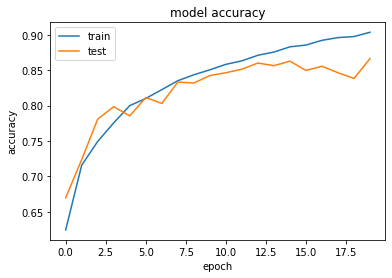

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

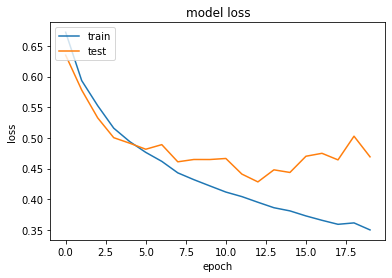

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()